In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [2]:
#Loading the ptbdb dats set
abnormal     = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_abnormal.csv", header = None)
normal       = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_normal.csv", header = None)

In [3]:
abnormal.shape

(10506, 188)

In [4]:
normal.shape

(4046, 188)

In [5]:
abnormal[187].unique()

array([1.])

In [6]:
normal[187].unique()

array([0.])

In [7]:
#Combining abnormal and normal
ptbdb_data = pd.merge(abnormal, normal, how='outer')
ptbdb_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ptbdb_data.shape

(14552, 188)

In [11]:
df1 = ptbdb_data.sample(frac = 1)
df1

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
905,0.910479,0.919500,0.913255,0.911867,0.891742,0.829979,0.786954,0.734212,0.673144,0.633588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12727,0.932482,0.908193,0.662001,0.304240,0.102511,0.000000,0.080280,0.144092,0.145739,0.148621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3156,0.948824,1.000000,0.777778,0.555095,0.434993,0.343476,0.294375,0.236515,0.191332,0.184647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13806,1.000000,0.465997,0.116580,0.075130,0.150907,0.186529,0.180699,0.187500,0.181671,0.185233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9927,1.000000,0.538365,0.128931,0.027044,0.047170,0.136478,0.168553,0.169811,0.203774,0.194969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,0.927925,0.714286,0.303491,0.000000,0.123788,0.187136,0.235294,0.349063,0.407240,0.431803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3625,0.988189,0.567717,0.196850,0.027559,0.000000,0.203937,0.246457,0.275591,0.277165,0.249606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12780,1.000000,0.527856,0.041683,0.055711,0.034870,0.078958,0.116232,0.127856,0.130261,0.136673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1401,1.000000,0.777912,0.490763,0.256225,0.004418,0.000000,0.043775,0.122088,0.287550,0.471486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
14552*0.25
print(14552-3638)

10914


In [19]:
test = df1.head(3638)
print(test.shape)

train = df1.tail(10914)
print(train.shape)

(3638, 188)
(10914, 188)


Count in each label: 
1    7901
0    3013
Name: 187, dtype: int64


<BarContainer object of 2 artists>

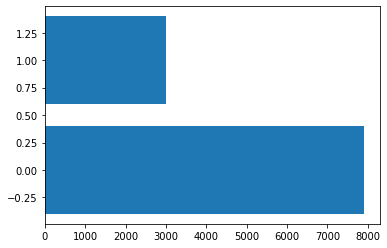

In [20]:
label_names = ['Normal Beats', 'Abnormal Beats']
labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

plt.barh(list(set(labels)), list(labels.value_counts()))

In [25]:
train_lbl0 = resample(train[train[187]==0], replace=True, n_samples=15000, random_state=113)
train_lbl1 = resample(train[train[187]==1], replace=True, n_samples=15000, random_state=113)

In [27]:
train= pd.concat([train_lbl0, train_lbl1])
labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())


Count in each label: 
0    15000
1    15000
Name: 187, dtype: int64


Text(0.5, 1.0, 'Normal Beats')

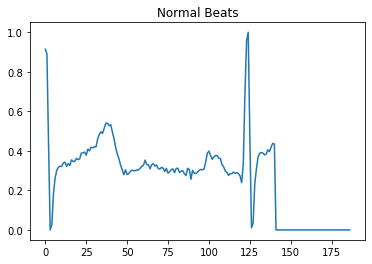

In [28]:
plt.plot(np.array(train_lbl0.sample(1))[0, :187])
plt.title(label_names[0])

Text(0.5, 1.0, 'Normal Beats')

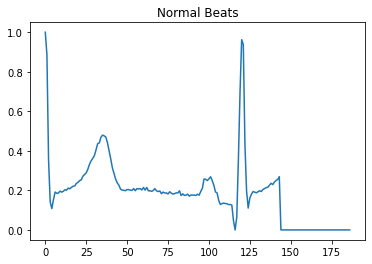

In [29]:
plt.plot(np.array(train_lbl0.sample(1))[0, :187])
plt.title(label_names[0])

In [30]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

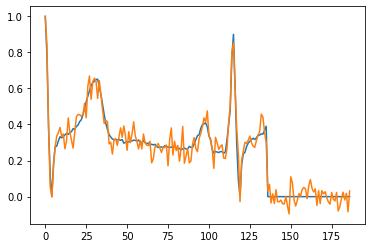

In [31]:
sample = train_lbl0.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)

In [32]:

ytrain = tensorflow.keras.utils.to_categorical(train[187])
ytest = tensorflow.keras.utils.to_categorical(test[187])

# Input to the model
xtrain = train.values[:, :187]
xtest = test.values[:, :187]

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [33]:
xtrain.shape

(30000, 187)

In [34]:
xtrain

array([[ 0.98136733,  0.72323731,  0.25418378, ..., -0.04707081,
         0.04765955, -0.0071066 ],
       [ 0.97898662,  1.1052499 ,  0.51839168, ..., -0.046412  ,
         0.0223894 ,  0.04079466],
       [ 0.92335103,  0.69596572,  0.43478388, ...,  0.03834947,
        -0.00507341, -0.08300092],
       ...,
       [ 0.98376095,  0.94198758,  0.7658349 , ...,  0.05784071,
        -0.02540869, -0.13556226],
       [ 0.96510636,  0.94278582,  0.69490154, ...,  0.0595563 ,
         0.01910607, -0.03886551],
       [ 0.90325434,  0.65247589,  0.07444072, ..., -0.06544526,
        -0.03079784, -0.02772618]])

In [35]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (30000, 187, 1)
Output:  (30000, 2)

Shape of test data: 
Input:  (3638, 187, 1)
Output:  (3638, 2)


In [38]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 182, 64)           448       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 90, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 18, 64)          

In [39]:
history = model.fit(xtrain, ytrain, epochs = 8, batch_size = 32, validation_data = (xtest, ytest))


Epoch 1/8
938/938 [==============================] - 29s 30ms/step - loss: 0.3007 - accuracy: 0.8712 - val_loss: 0.1422 - val_accuracy: 0.9439
Epoch 2/8
938/938 [==============================] - 28s 29ms/step - loss: 0.1325 - accuracy: 0.9508 - val_loss: 0.1085 - val_accuracy: 0.9596
Epoch 3/8
938/938 [==============================] - 27s 29ms/step - loss: 0.0866 - accuracy: 0.9678 - val_loss: 0.0888 - val_accuracy: 0.9689
Epoch 4/8
938/938 [==============================] - 27s 29ms/step - loss: 0.0652 - accuracy: 0.9753 - val_loss: 0.0775 - val_accuracy: 0.9736
Epoch 5/8
938/938 [==============================] - 27s 29ms/step - loss: 0.0524 - accuracy: 0.9813 - val_loss: 0.0669 - val_accuracy: 0.9838
Epoch 6/8
938/938 [==============================] - 32s 34ms/step - loss: 0.0443 - accuracy: 0.9845 - val_loss: 0.0631 - val_accuracy: 0.9838
Epoch 7/8
938/938 [==============================] - 31s 33ms/step - loss: 0.0332 - accuracy: 0.9874 - val_loss: 0.0778 - val_accuracy: 0.9810

In [42]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

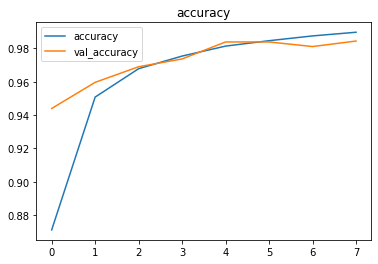

In [43]:
plot(history.history, "accuracy", "val_accuracy")

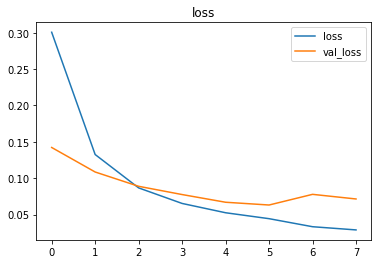

In [44]:
plot(history.history, "loss", "val_loss")

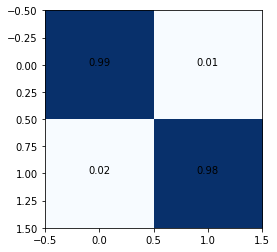

In [45]:
ypred = model.predict(xtest)

cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [46]:
print("The distribution of test set labels")
print(test[187].value_counts())

print('F1_score = ', f1_score(ytest.argmax(axis=1), ypred.argmax(axis=1), average = 'macro'))

The distribution of test set labels
1.0    2605
0.0    1033
Name: 187, dtype: int64
F1_score =  0.9808844361352982
